In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree

from functions import all_models as m
from functions import metrics, plot_importances

%matplotlib inline
sns.set(font_scale=2)

In [2]:
df=pd.read_csv('Cleaned Data.csv', index_col=0)
df.head()

C:\Users\ferra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Subject Age Group,Subject ID,Stop Resolution,Officer ID,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Precinct,Wrongful Stop,Weapon,Officer Age Group,Day of Week,Year,Month
1598,1 - 17,0,Arrest,7715,1,White,American Indian or Alaska Native,Male,No Call,East,0.0,0.0,Millenial,Sunday,2015,September
1604,1 - 17,0,No Action,7655,1,Nat Hawaiian/Oth Pac Islander,Black or African American,Male,No Call,North,1.0,0.0,Millenial,Tuesday,2015,May
1610,1 - 17,0,No Action,6984,1,White,Black or African American,Male,No Call,East,1.0,0.0,Millenial,Tuesday,2015,May
1611,1 - 17,0,No Action,7434,0,White,Black or African American,Male,No Call,West,1.0,0.0,Millenial,Sunday,2015,May
1612,1 - 17,0,No Action,7434,0,White,Black or African American,Male,No Call,West,1.0,0.0,Millenial,Sunday,2015,May


In [3]:
y = df['Wrongful Stop']
x=df.drop(columns=['Stop Resolution', 'Wrongful Stop', 'Officer ID'])

In [4]:
x = pd.get_dummies(x, drop_first=True, columns=['Subject Age Group', 'Officer Race', 'Subject Perceived Race', 
                                                'Subject Perceived Gender', 'Weapon', 'Call Type', 'Precinct',
                                                'Officer Age Group', 'Day of Week', 'Year', 'Month'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)

Logistic Regression Results:


C:\Users\ferra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


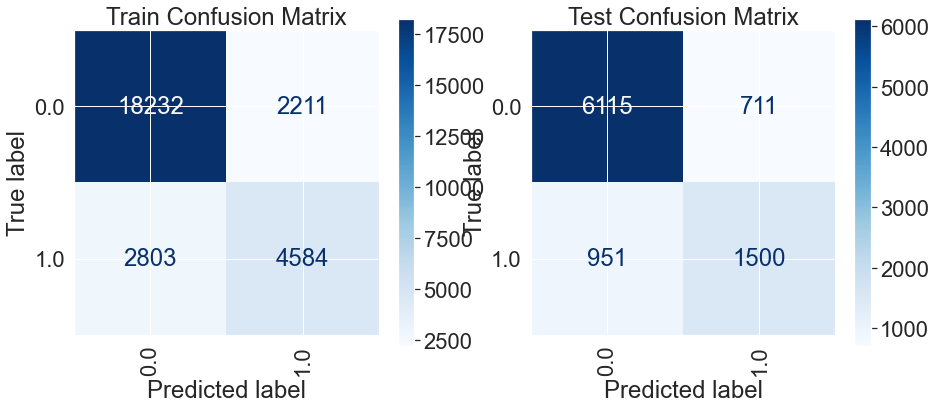

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      6826
         1.0       0.68      0.61      0.64      2451

    accuracy                           0.82      9277
   macro avg       0.77      0.75      0.76      9277
weighted avg       0.82      0.82      0.82      9277



K-Nearest Neighbors Results:


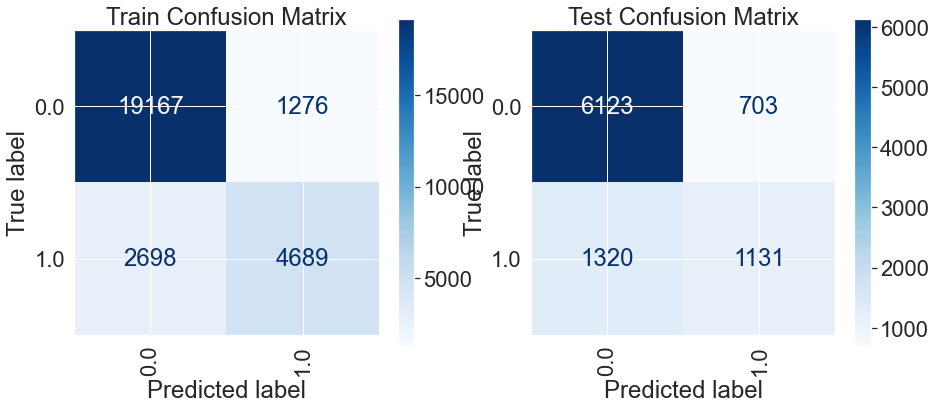

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      6826
         1.0       0.62      0.46      0.53      2451

    accuracy                           0.78      9277
   macro avg       0.72      0.68      0.69      9277
weighted avg       0.77      0.78      0.77      9277



Naive Bayes Results:


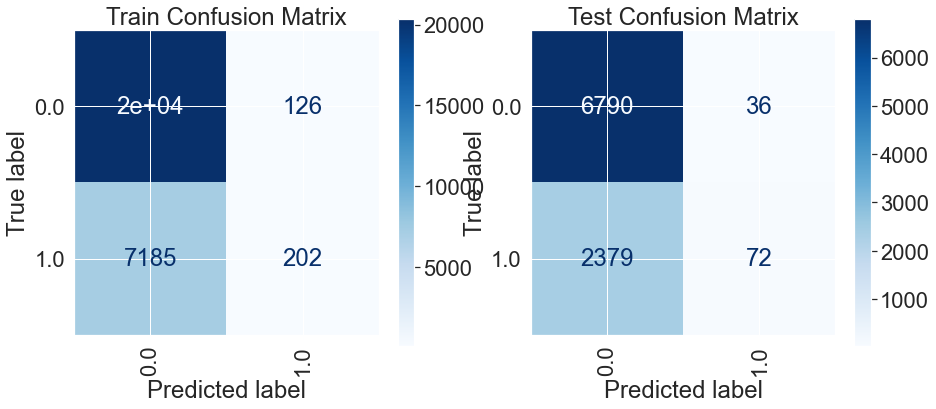

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85      6826
         1.0       0.67      0.03      0.06      2451

    accuracy                           0.74      9277
   macro avg       0.70      0.51      0.45      9277
weighted avg       0.72      0.74      0.64      9277



Decision Tree Results:


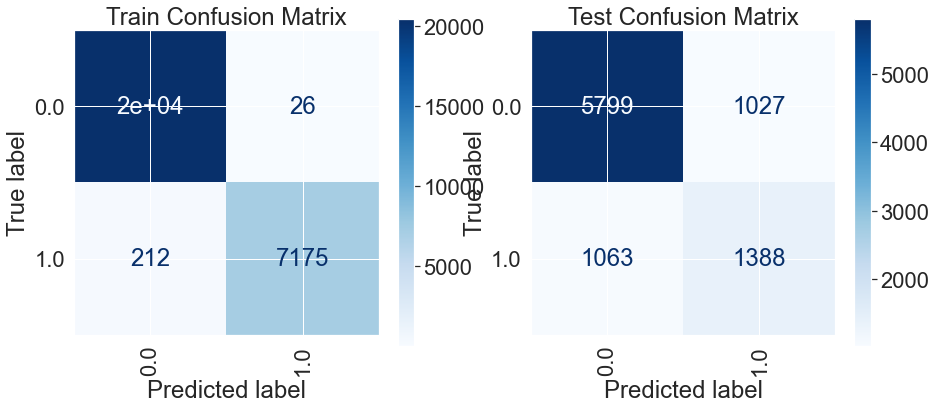

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      6826
         1.0       0.57      0.57      0.57      2451

    accuracy                           0.77      9277
   macro avg       0.71      0.71      0.71      9277
weighted avg       0.77      0.77      0.77      9277



Random Forest Results:


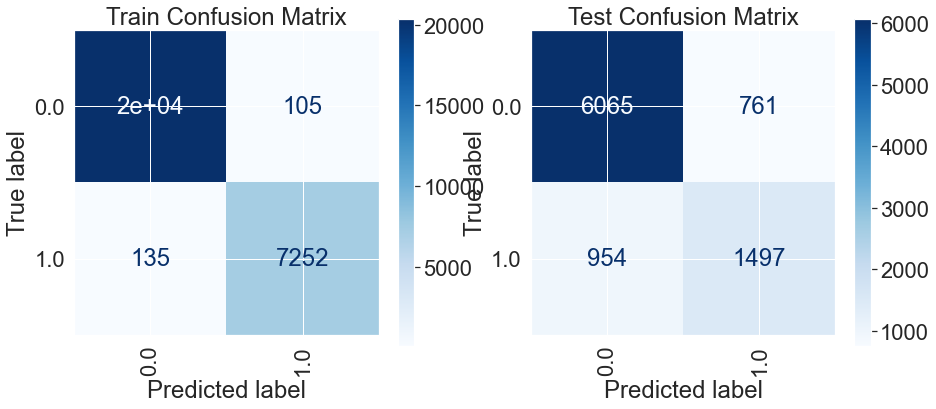

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      6826
         1.0       0.66      0.61      0.64      2451

    accuracy                           0.82      9277
   macro avg       0.76      0.75      0.76      9277
weighted avg       0.81      0.82      0.81      9277



XGBoost Results:
[18:48:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ferra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


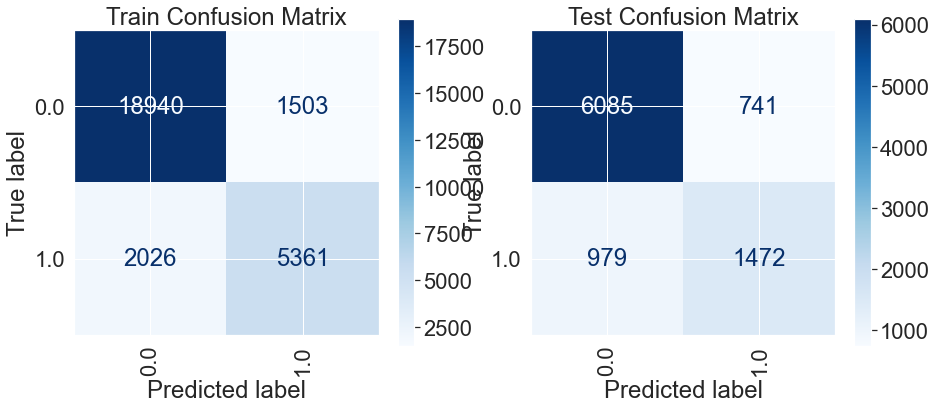

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      6826
         1.0       0.67      0.60      0.63      2451

    accuracy                           0.81      9277
   macro avg       0.76      0.75      0.75      9277
weighted avg       0.81      0.81      0.81      9277



Support Vector Machine Results:


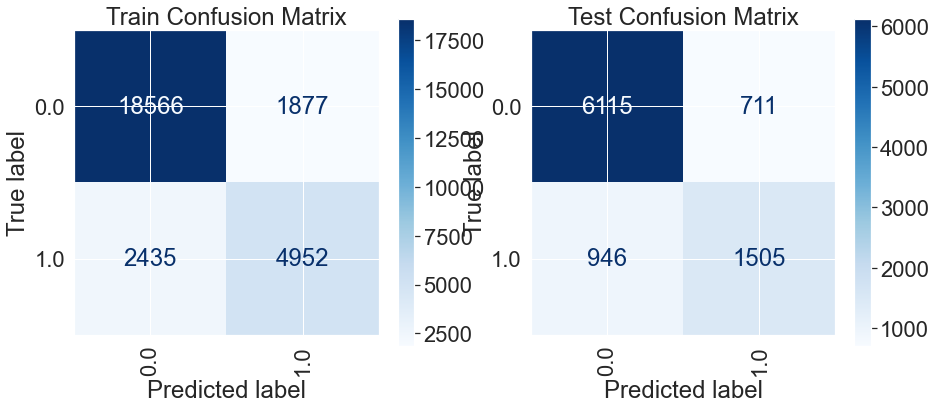

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      6826
         1.0       0.68      0.61      0.64      2451

    accuracy                           0.82      9277
   macro avg       0.77      0.75      0.76      9277
weighted avg       0.82      0.82      0.82      9277





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,77.19%,75.39%,82.08%,76.19%
K-Nearest Neighbors,71.97%,67.92%,78.19%,69.31%
Naive Bayes,70.36%,51.21%,73.97%,45.26%
Decision Tree,70.99%,70.79%,77.47%,70.89%
Random Forest,76.35%,74.96%,81.51%,75.60%
XGBoost,76.33%,74.60%,81.46%,75.37%
Support Vector Machine,77.26%,75.49%,82.14%,76.28%


The model with the highest precision score is Support Vector Machine.
The model with the highest recall score is Support Vector Machine.
The model with the highest accuracy score is Support Vector Machine.
The model with the highest F1 score is Support Vector Machine.


In [6]:
models = m(x_train, x_test, y_train, y_test)

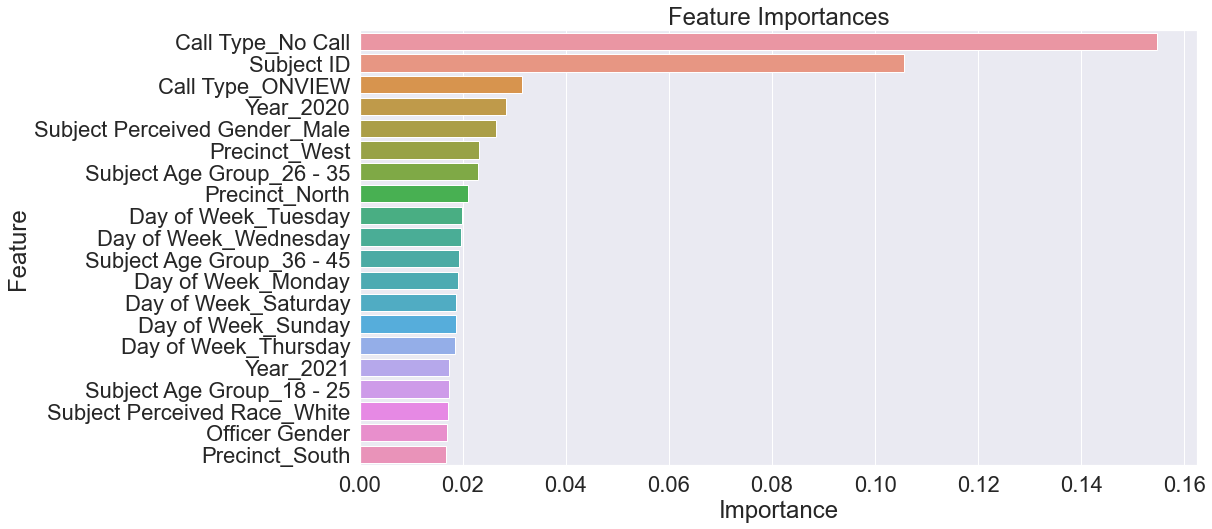

In [7]:
plot_importances(models[4], x_train.columns)

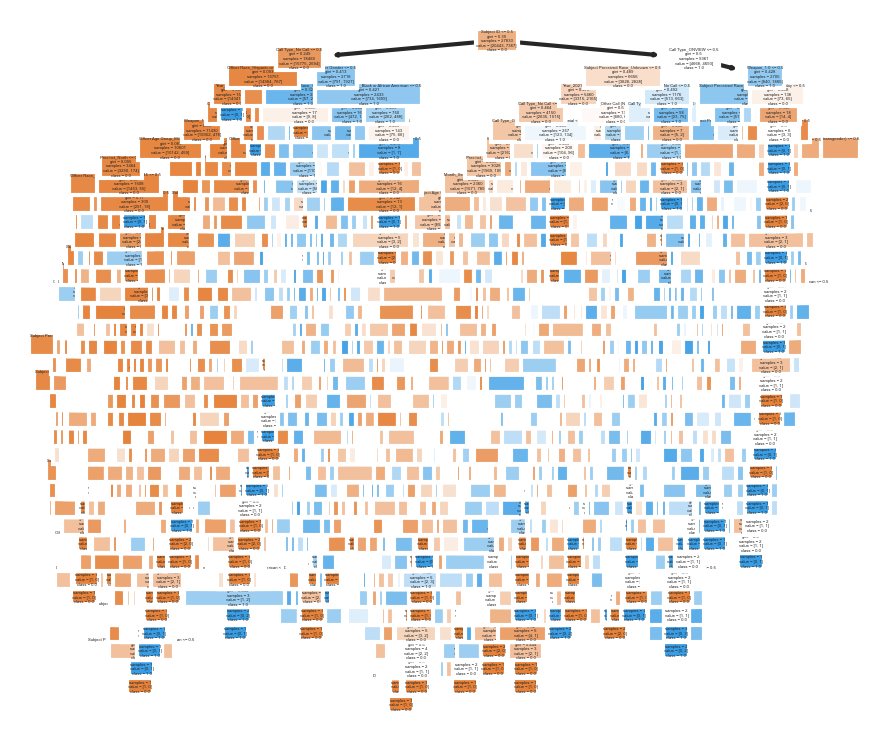

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(models[3],
               feature_names = x_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()